In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster

In [2]:
ro_matrix = np.load("../input/condensed_distance_matrix_ratcliffobershelp.npy")

In [3]:
Z = linkage(ro_matrix, 'average')

In [4]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

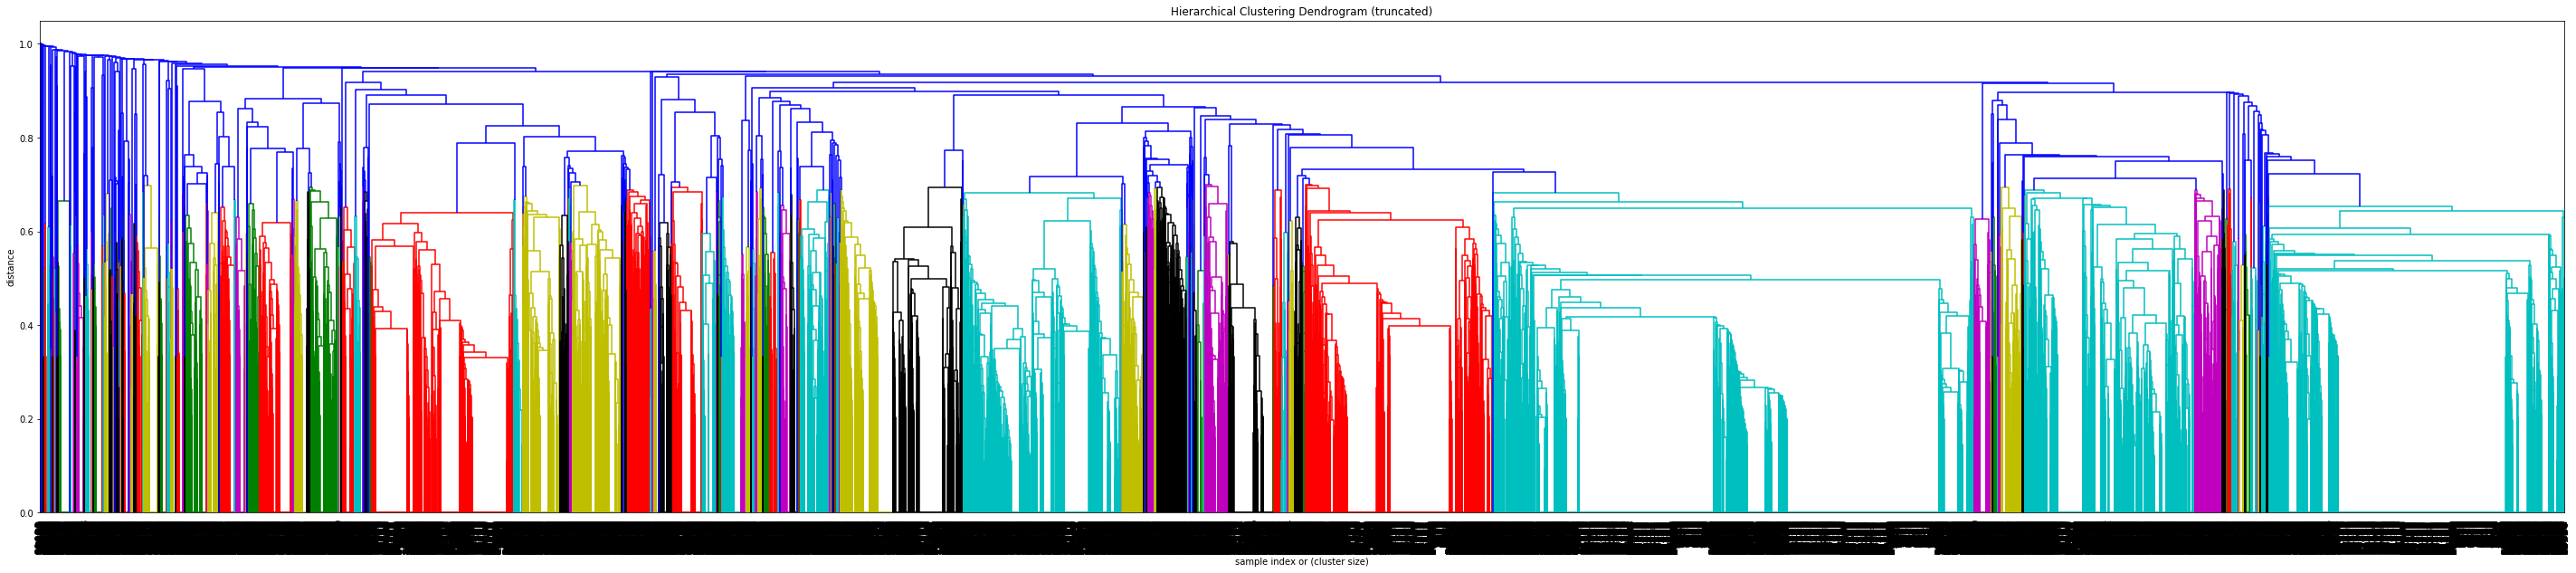

In [5]:
fig = plt.figure(figsize=(50, 10))
fancy_dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

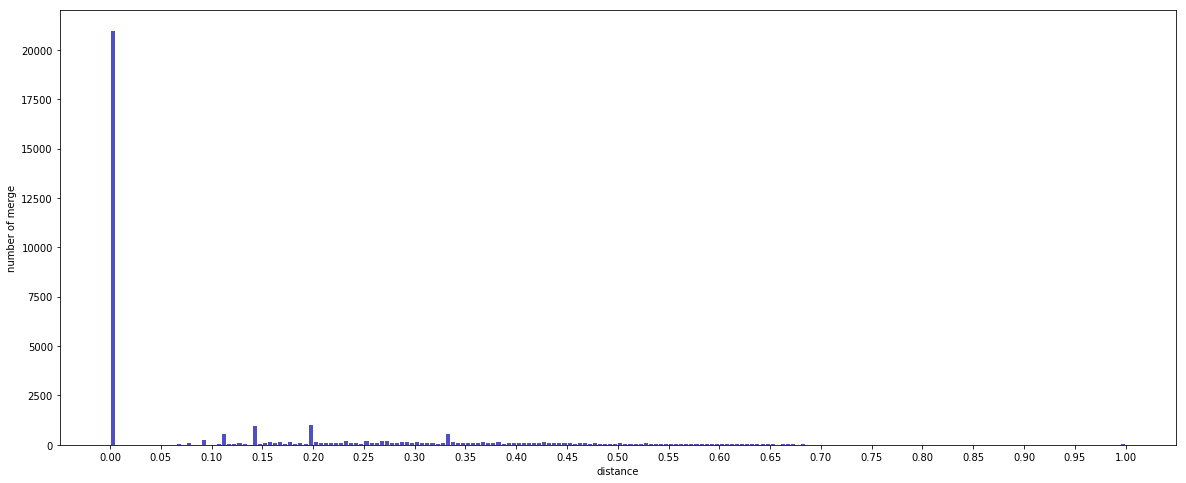

In [6]:
X = [l[2] for l in Z]

fig = plt.figure(figsize=(20, 8))
n, bins, patches = plt.hist(X, bins=200, density=False, cumulative=False, color='#0504aa',
                            alpha=0.7, rwidth=0.8)
plt.xlabel('distance')
plt.ylabel('number of merge')
plt.xticks(np.arange(0,1+0.05,0.05))
plt.show()

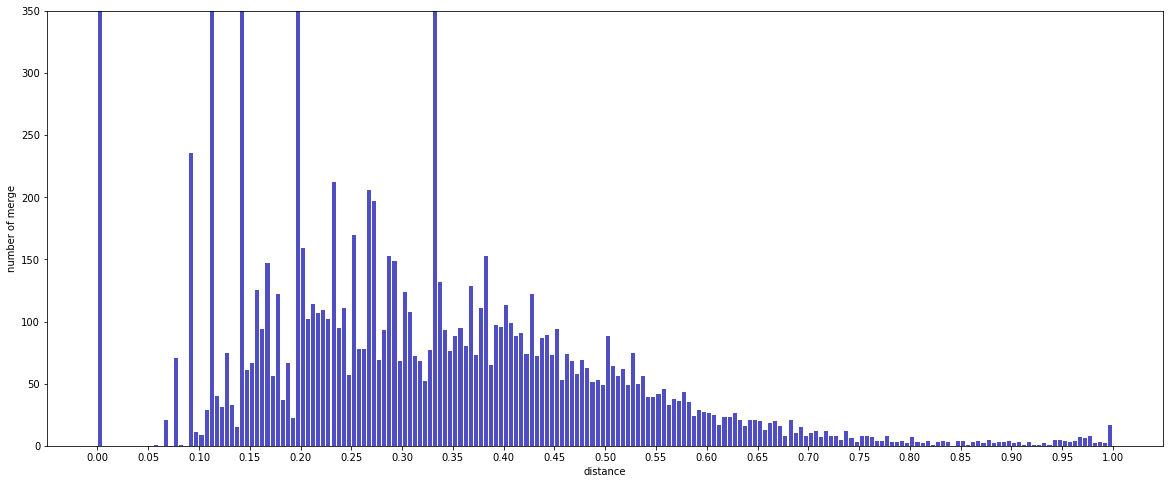

In [7]:
fig = plt.figure(figsize=(20, 8))
plt.hist(X, bins=200, density=False, cumulative=False, color='#0504aa',
                            alpha=0.7, rwidth=0.8)
plt.xlabel('distance')
plt.ylabel('number of merge')
plt.xticks(np.arange(0,1+0.05,0.05))
plt.ylim(top=350)
plt.show()

In [8]:
nums_of_cluster = []
s_scores = []
distance_matrix = squareform(ro_matrix)

In [9]:
for k in range(2,200):
    clusters = fcluster(Z, k, criterion='maxclust')
    s_score = metrics.silhouette_score(distance_matrix, clusters, metric='precomputed')
    nums_of_cluster.append(k)
    s_scores.append(s_score)

In [17]:
for k in range(200,500):
    clusters = fcluster(Z, k, criterion='maxclust')
    s_score = metrics.silhouette_score(distance_matrix, clusters, metric='precomputed')
    nums_of_cluster.append(k)
    s_scores.append(s_score)

In [19]:
for k in range(500,800):
    clusters = fcluster(Z, k, criterion='maxclust')
    s_score = metrics.silhouette_score(distance_matrix, clusters, metric='precomputed')
    nums_of_cluster.append(k)
    s_scores.append(s_score)

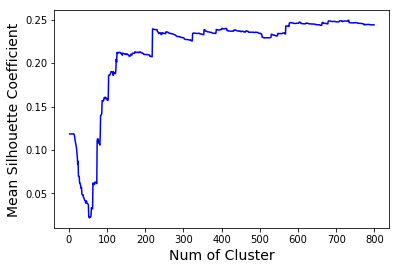

In [32]:
plt.plot(nums_of_cluster, s_scores, c="blue")

plt.xlabel("Num of Cluster", fontsize=14)
plt.ylabel("Mean Silhouette Coefficient", fontsize=14)
plt.show()

In [21]:
max(s_scores)

0.24923369331521744

In [22]:
nums_of_cluster[s_scores.index(max(s_scores))]

732

In [23]:
k = nums_of_cluster[s_scores.index(max(s_scores))]
clusters = fcluster(Z, k, criterion='maxclust')

In [24]:
lists = []

with open("../input/anonymous-msweb.data", "r") as f:
    for line in f:
        if line[0] == "C":
            key = int(line[-6:-1])
            lists.append([key,[]]) #[[10001]]
        if line[0] == "V" and key > 0:
            read_value = int(line[2:6])
            lists[-1][1].append(read_value)

In [25]:
dict_segments = dict()
for i, group_num in enumerate(clusters):
    if group_num in dict_segments:
        dict_segments[group_num].append(lists[i][0])
    else:
        dict_segments[group_num] = [lists[i][0]]

In [26]:
df_segments = pd.DataFrame(list(dict_segments.items()), columns=['Group Num', 'Visitor'])

In [27]:
df_segments.head()

,Group Num,Visitor
0,619,"[10001, 10092, 10442, 10469, 10754, 10990, 110..."
1,659,"[10002, 10003, 10100, 10308, 10320, 10392, 106..."
2,38,"[10004, 10815, 16407, 17323, 19426, 28820, 311..."
3,584,"[10005, 15131, 16582, 17373, 18415, 18764, 205..."
4,717,"[10006, 10008, 10018, 10022, 10042, 10044, 100..."
5,576,"[10007, 10048, 10062, 10079, 10088, 10094, 101..."
6,599,"[10009, 10023, 10043, 10059, 10125, 10146, 101..."
7,180,"[10010, 10571, 16610, 19733, 22951, 27586, 339..."
8,388,"[10011, 13159, 15125, 16662, 17563, 17934, 201..."
9,122,"[10012, 10456, 10638, 10999, 11473, 11896, 120..."
